In [4]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [7]:
!pip install scikit-learn==0.24.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [8]:
!pip install statsmodels==0.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.1
    Uninstalling statsmodels-0.14.1:
      Successfully uninstalled statsmodels-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires statsmodels>=0.14.0, but you have statsmodels 0.13.1 which is incompatible.


In [11]:
!pip install numpy==1.21.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.21.5 which is incompatible.
flax 0.8.2 requires numpy>=1.22, but you have numpy 1.21.5 which is incompatible.
jax 0.4.26 requires numpy>=1.22, but you have numpy 1.21.5 which is incompatible.
jaxlib 0.4.26+cuda12.cudnn89 requires numpy>=1.22, but you have numpy 1.21.5 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 1.21.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.21.5 which is incompatible.
plotnine 0.12.4 requires numpy

In [3]:
# Монтируем Google Диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import STL
import matplotlib.dates as mdates

Полученные после парсинга данные необходимо проанализировать. Основное внимание уделим коду 1 - "Товары и услуги" это меячный прирост в целом по РФ.

In [78]:
pivot_df = pd.read_csv('/content/drive/MyDrive/trial/pivot_df.csv', sep = ';', encoding='Windows-1251', parse_dates = [0], index_col = [0]) #Загружаем спарсенные данные Росстата по РФ

In [79]:
# Посмотрим на первые несколько строк датафрейма
pivot_df.head()

,1,10,100,1000,1001,102,105,106,107,11,...,9932,9933,9940,9941,9942,9950,9990,9991,9992,9993
2002-01-01,103.09,100.70,100.52,101.37,101.37,NaN,100.89,NaN,100.82,101.95,...,103.36,NaN,102.24,104.32,101.50,NaN,NaN,NaN,NaN,NaN
2002-02-01,101.16,100.24,100.04,100.87,100.87,NaN,100.54,NaN,100.49,101.81,...,102.91,NaN,101.44,100.99,101.60,NaN,NaN,NaN,NaN,NaN
2002-03-01,101.08,100.41,100.37,100.58,100.58,NaN,100.32,NaN,100.35,101.81,...,102.62,NaN,100.72,100.60,100.76,NaN,NaN,NaN,NaN,NaN
2002-04-01,101.16,100.29,100.18,100.27,100.27,NaN,100.59,NaN,100.03,101.09,...,100.45,NaN,100.13,100.04,100.16,NaN,NaN,NaN,NaN,NaN
2002-05-01,101.69,100.92,101.11,100.52,100.52,NaN,100.49,NaN,99.89,100.57,...,101.22,NaN,100.47,100.37,100.51,NaN,NaN,NaN,NaN,NaN


In [80]:
# Посмотрим статданные
print(pivot_df.describe())

                1          10         100        1000        1001         102  \
count  267.000000  267.000000  267.000000  267.000000  267.000000   15.000000   
mean   100.699663  100.676105  100.652360  100.781199  100.781199  100.302667   
std      0.715317    0.727893    0.936067    1.378515    1.378515    0.929520   
min     99.460000   99.600000   99.090000   99.070000   99.070000   99.000000   
25%    100.345000  100.165000   99.960000  100.130000  100.130000   99.565000   
50%    100.570000  100.500000  100.480000  100.430000  100.430000  100.570000   
75%    100.880000  100.975000  101.130000  100.870000  100.870000  100.940000   
max    107.610000  103.920000  104.400000  112.940000  112.940000  102.250000   

              105         106         107          11  ...        9932  \
count  267.000000  243.000000  252.000000  267.000000  ...  267.000000   
mean   100.701273  100.722181  100.729643  100.754007  ...  100.741124   
std      0.772021    0.590797    1.196713    0.8

In [81]:
# Подсчет пропущенных значений
missing_values = pivot_df.isnull().sum()

# Вывод пропущенных значений в таблице
print("Пропущенные значения в датафрейме:")
print(missing_values)

Пропущенные значения в датафрейме:
1        0
10       0
100      0
1000     0
1001     0
        ..
9950    12
9990    24
9991    24
9992    24
9993    24
Length: 1011, dtype: int64


In [82]:
# Подсчет общего количества пропущенных значений во всем датафрейме
total_missing_values = pivot_df.isnull().sum().sum()

print("Общее количество пропущенных значений в датафрейме:", total_missing_values)

Общее количество пропущенных значений в датафрейме: 89275


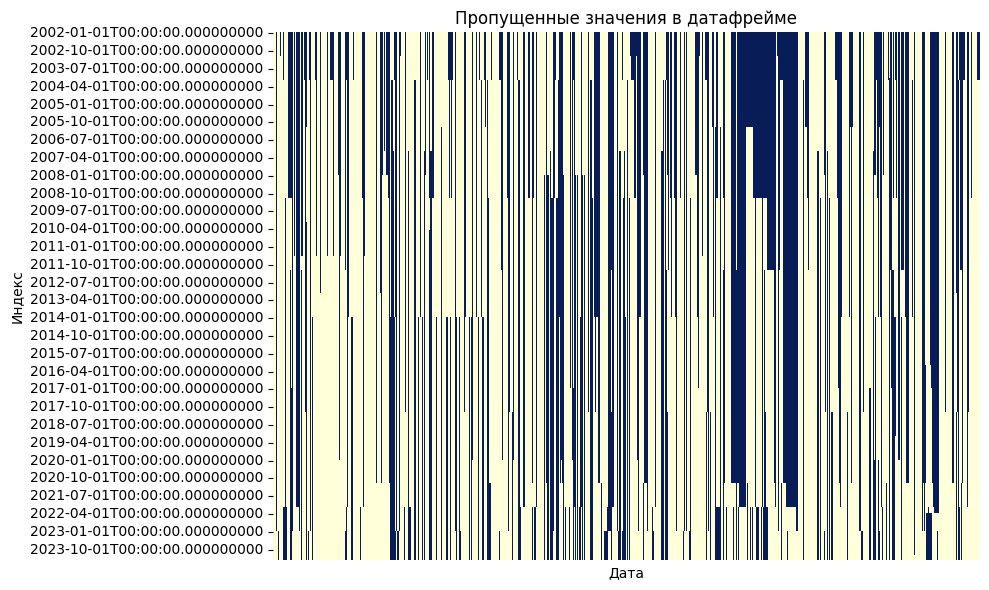

In [83]:
# Создание тепловой карты с измененной цветовой палитрой
plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_df.isnull(), cbar=False, cmap='YlGnBu')  # Используем цветовую карту 'YlGnBu'

plt.title('Пропущенные значения в датафрейме')
plt.xticks([])  # Удаление подписей оси X
plt.xlabel('Дата')
plt.ylabel('Индекс')
plt.tight_layout()

# Добавление легенды
cbar = ax.collections[0].colorbar

plt.show()

Мы видим, что в данных много пропусков. Для их заполнения будут использоваться месячные медианные значения, для повторения сезонности. Например, пропуск в августе 2005 года будет заменен на медиану всех августов.

In [84]:
monthly_median = pivot_df.groupby(pivot_df.index.month).median() #создаем таблицу с медианами на 12 месяцев

In [85]:
monthly_median

,1,10,100,1000,1001,102,105,106,107,11,...,9932,9933,9940,9941,9942,9950,9990,9991,9992,9993
1,101.010,100.390,100.310,100.510,100.510,100.395,100.520,100.560,100.63,100.790,...,101.020,100.580,100.100,100.190,100.090,100.735,100.500,100.0,100.630,100.880
2,100.780,100.290,100.040,100.660,100.660,100.090,100.480,100.610,101.09,100.870,...,100.580,100.400,100.130,100.270,100.040,100.265,100.530,100.0,100.680,100.620
3,100.630,100.430,100.320,100.320,100.320,99.970,100.580,100.760,100.91,100.840,...,100.360,100.480,100.020,100.030,100.020,100.170,100.530,100.0,100.610,100.510
4,100.540,100.425,100.280,100.290,100.290,99.350,100.495,100.465,100.38,100.610,...,100.450,100.155,100.015,100.000,100.005,100.260,100.395,100.0,100.525,100.585
5,100.510,100.570,100.510,100.420,100.420,99.690,100.315,100.485,100.08,100.460,...,100.235,100.075,100.010,100.015,100.000,100.140,100.460,100.0,100.415,100.760
6,100.510,100.495,100.540,100.190,100.190,99.670,100.335,100.555,99.87,100.355,...,100.285,100.145,100.090,100.060,100.065,100.140,100.320,100.0,100.340,100.355
7,100.525,100.480,100.560,100.215,100.215,99.460,100.365,100.455,99.84,100.355,...,100.195,100.210,100.395,100.225,100.465,100.150,100.280,100.0,100.360,100.410
8,100.090,100.580,100.645,100.205,100.205,100.800,100.575,100.355,100.01,100.340,...,100.385,100.305,101.575,101.275,101.625,101.290,100.285,100.0,100.310,100.505
9,100.295,100.745,100.960,100.485,100.485,100.620,100.780,100.585,100.35,100.415,...,102.505,100.750,106.855,106.685,107.030,103.970,100.425,100.0,100.525,100.555
10,100.525,100.640,100.660,100.545,100.545,100.570,100.835,100.715,100.48,100.560,...,100.520,100.405,100.150,100.020,100.080,100.480,100.380,100.0,100.465,100.295


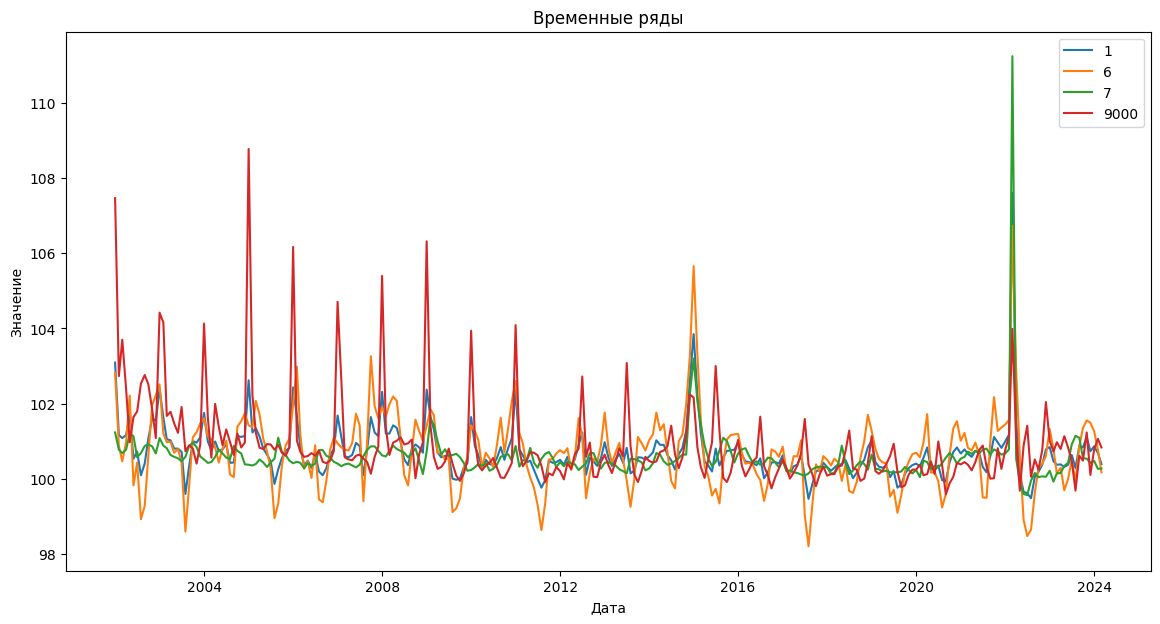

In [86]:
# Визуализация временных рядов для нескольких выбранных столбцов
selected_columns = ['1', '6', '7', '9000']  # Все товары и услуги, Проды, Непроды, Услуги

plt.figure(figsize=(14, 7))
for col in selected_columns:
    plt.plot(pivot_df.index, pivot_df[col], label=col)

plt.title('Временные ряды')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

p-значение теста Шапиро-Уилка для столбца '1': 6.0516994056712664e-21


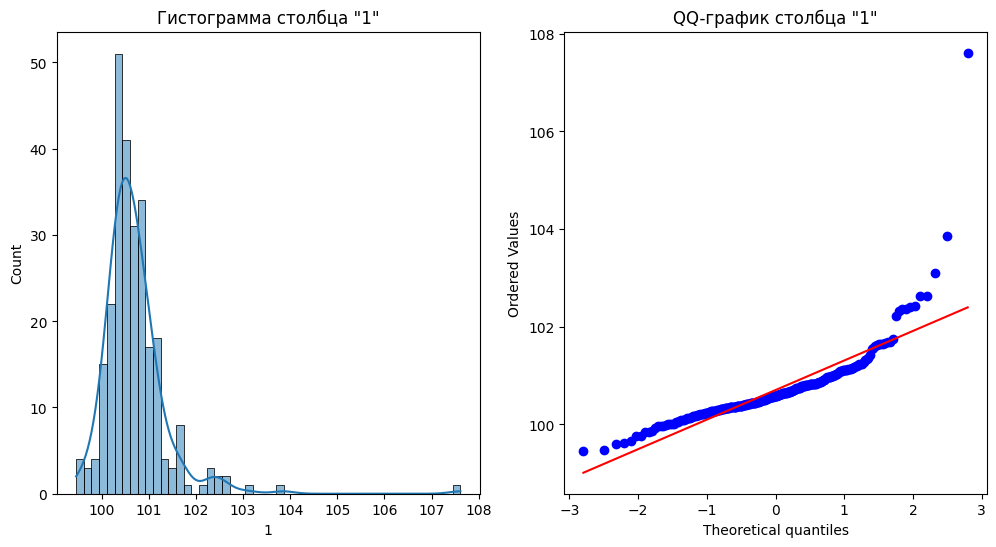

In [87]:
# Проверка на нормальность с помощью теста Шапиро-Уилка
shapiro_test = stats.shapiro(pivot_df['1'])
print("p-значение теста Шапиро-Уилка для столбца '1':", shapiro_test[1])

# Построим гистограмму и QQ-график для визуальной оценки нормальности
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(pivot_df['1'], kde=True)
plt.title('Гистограмма столбца "1"')

plt.subplot(1, 2, 2)
stats.probplot(pivot_df['1'], plot=plt)
plt.title('QQ-график столбца "1"')

plt.show()

In [89]:
filtered_df_no_outliers = pd.DataFrame()

# Пройдемся по каждому столбцу и удалим выбросы
for column in pivot_df.columns:
    # Определяем межквартильный размах для столбца
    Q1 = pivot_df[column].quantile(0.25)
    Q3 = pivot_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определяем границы для определения выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтруем данные
    filtered_data = pivot_df[(pivot_df[column] >= lower_bound) & (pivot_df[column] <= upper_bound)]

    # Проверяем, что фильтрованные данные не пусты
    if not filtered_data.empty:
        # Используем pd.concat для объединения столбцов
        filtered_df_no_outliers = pd.concat([filtered_df_no_outliers, filtered_data[column]], axis=1)

# Выводим информацию о новом датафрейме
print("Размер нового датафрейма после удаления выбросов:", filtered_df_no_outliers.shape)

Размер нового датафрейма после удаления выбросов: (267, 1011)


Далее удаленные выбросы также заменим на медианы

In [95]:
# Преобразуем индекс к формату datetime
filtered_df_no_outliers.index = pd.to_datetime(filtered_df_no_outliers.index)

# Создаем маску для пропущенных значений в filtered_df_no_outliers
mask = filtered_df_no_outliers.isnull()

# Заменяем NaN в filtered_df_no_outliers на медианные значения из monthly_median
for column in filtered_df_no_outliers.columns:
    for month in range(1, 13):
        median_value = monthly_median.loc[month, column]
        # Теперь можно использовать .index.month для извлечения месяца из индекса
        filtered_df_no_outliers.loc[mask[column] & (filtered_df_no_outliers.index.month == month), column] = median_value

# Выводим результат
filtered_df_no_outliers

,1,10,100,1000,1001,102,105,106,107,11,...,9932,9933,9940,9941,9942,9950,9990,9991,9992,9993
2002-01-01,101.01,100.70,100.52,101.37,101.37,100.395,100.89,100.560,100.82,101.95,...,101.02,100.580,100.10,100.19,100.09,100.735,100.500,100.0,100.630,100.880
2002-02-01,101.16,100.24,100.04,100.87,100.87,100.090,100.54,100.610,100.49,101.81,...,100.58,100.400,100.13,100.99,100.04,100.265,100.530,100.0,100.680,100.620
2002-03-01,101.08,100.41,100.37,100.58,100.58,99.970,100.32,100.760,100.35,101.81,...,100.36,100.480,100.72,100.60,100.76,100.170,100.530,100.0,100.610,100.510
2002-04-01,101.16,100.29,100.18,100.27,100.27,99.350,100.59,100.465,100.03,101.09,...,100.45,100.155,100.13,100.04,100.16,100.260,100.395,100.0,100.525,100.585
2002-05-01,100.51,100.92,101.11,100.52,100.52,99.690,100.49,100.485,99.89,100.57,...,101.22,100.075,100.47,100.37,100.51,100.140,100.460,100.0,100.415,100.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,101.11,101.18,101.07,99.69,99.69,102.250,101.67,101.140,100.42,100.82,...,100.25,101.350,100.05,100.00,100.06,100.260,101.110,100.0,100.470,100.160
2023-12-01,100.73,100.46,99.92,99.78,99.78,101.220,100.82,100.850,100.68,100.74,...,100.12,100.180,100.00,100.00,100.00,100.110,100.700,100.0,101.130,100.700
2024-01-01,100.86,99.97,99.53,100.03,100.03,101.100,100.11,100.400,100.63,100.77,...,101.41,101.390,100.02,100.03,100.02,100.540,100.560,100.0,100.780,100.880
2024-02-01,100.68,100.18,99.97,99.73,99.73,100.940,100.15,100.720,101.09,100.55,...,100.46,101.460,100.01,100.04,100.00,100.220,100.410,100.0,100.680,100.450


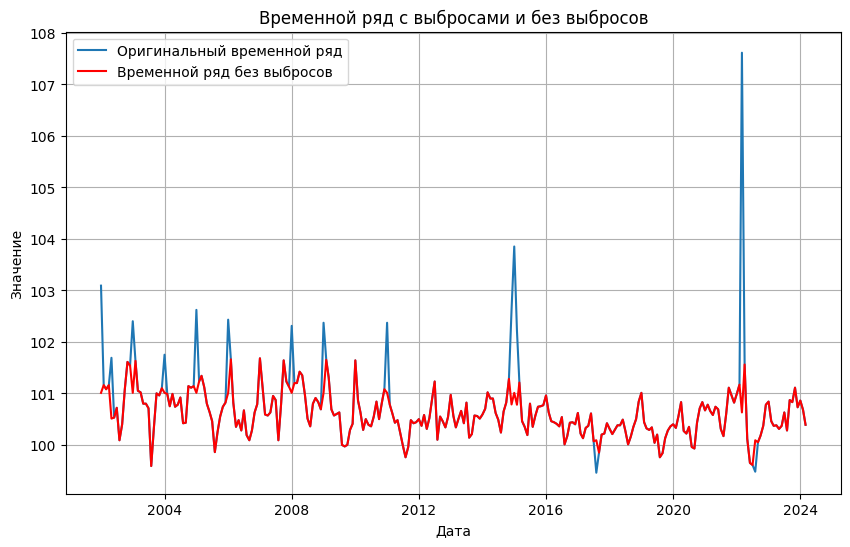

In [96]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.index, pivot_df['1'], label='Оригинальный временной ряд')
plt.plot(filtered_df_no_outliers.index, filtered_df_no_outliers['1'], label='Временной ряд без выбросов', color='red')
plt.title('Временной ряд с выбросами и без выбросов')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

Далее проведем анализ сезонности

In [99]:
decomp = STL(filtered_df_no_outliers['1'], seasonal=13).fit() # Предполагаем, что сезонность равна 12 месяцам

In [100]:
sf = decomp.seasonal # получаем блок данных decomp и из него выделяем сезонный фактор
trend = decomp.trend # тренд
resid = decomp.resid # остатки
sa = filtered_df_no_outliers['1'] - sf # вычитаем из оригинального ряда сезонный фактор чтобы получить сглаженный ряд

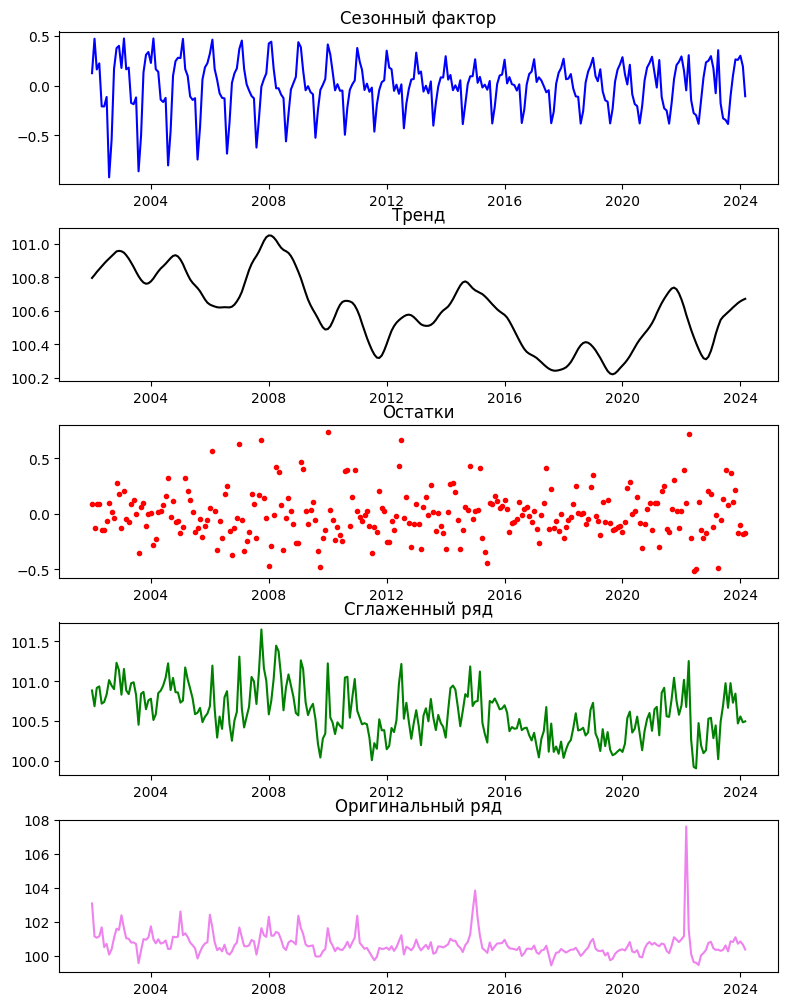

In [101]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(8, 10)) # определяем фон фигуры и графики на ней, указав их число и размер фона

fig.tight_layout() # подгоняем подписи и другие элементы графика чтобы они не перекрывали друг друга

ax1.plot(sf, color='blue')
ax2.plot(trend, color='black')
ax3.plot(resid, '.', color='red',) # рисуем графики, конкретно остатки указываем точками
ax4.plot(sa, color='green',)
ax5.plot(pivot_df['1'], color='violet',)

ax1.title.set_text('Сезонный фактор') # указываем подписи каждого графика
ax2.title.set_text('Тренд')
ax3.title.set_text('Остатки')
ax4.title.set_text('Сглаженный ряд')
ax5.title.set_text('Оригинальный ряд')

plt.show() # показываем картинку

Сезонный фактор после удаления выбросов выделяется корректно, наблюдаются выраженные годовые тренды, отражающие экономические процессы, влияющие на динамику цен в соотвествующие периоды. В целом, можно сказать, что данные пригодны для построения прогноза.